In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pathlib

## Get the first file that exists in small dataset

In [3]:
import pandas as pd

csvData = pd.read_csv('maestro-v2.0.0/maestro-v2.0.0.csv')
songname = 'maestro-v2.0.0/'
for index, row in csvData.iterrows():
    if row.year == 2008:
        songname += row.audio_filename
        break


In [5]:
cmap = plt.get_cmap('inferno')
song_folder = 'maestro-v2.0.0_full/maestro-v2.0.0/'
image_folder = 'maestro-v2.0.0/images/'

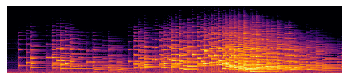

In [4]:
y , sr = librosa.load(songname, mono=True, duration=30)
spectogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, n_fft=2048, hop_length=1024)
spectogram = librosa.power_to_db(spectogram, ref=np.max)
plt.axes().set_aspect('equal')
plt.imshow(spectogram, origin="lower", cmap=cmap);
plt.axis('off');

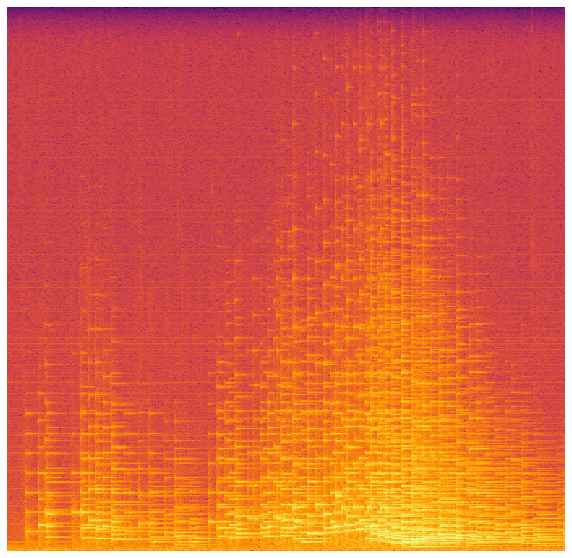

In [5]:
plt.figure(figsize=(10,10))
plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
plt.axis('off');
plt.savefig('demo.png')

In [12]:
import csv
# exclude = ['Antonio Soler', 
#                        'Carl Maria von Weber', 
#                        'Charles Gounod', 
#                        'C√©sar Franck', 
#                        'Fritz Kreisler', 
#                        'George Enescu',
#                        'Georges Bizet', 
#                        'Giuseppe Verdi', 
#                        'Henry Purcell', 
#                        'Jean-Philippe Rameau', 
#                        'Johann Christian Fischer', 
#                        'Johann Pachelbel', 
#                        'Johann Strauss', 
#                        'Mikhail Glinka', 
#                        'Mily Balakirev', 
#                        '', 
#                        '', 
#                        '',
#                        '',
#                        '',
#                        '',
#                        '',
#                        '',
#                        '',]
labels = [[]]
test_labels = [[]]
train_labels = [[]]
counts = csvData.groupby('canonical_composer').count()
limited_counts = csvData.loc[csvData['year'] == 2008].groupby('canonical_composer').count()
include = counts.loc[counts['canonical_title'] > 5].index
limited_include = limited_counts.loc[limited_counts['canonical_title'] > 5].index
print(limited_include)
print(len(limited_include))
limit = True
plt.figure(figsize=(10,10))
for index, row in csvData.iterrows():
    songpath = song_folder + row.audio_filename
#     if os.path.exists(songpath):
    if os.path.exists(songpath) and row.year == 2008:
        filename_split = row.audio_filename.split('.')[0]
        csv_png_filename = f'{filename_split}.png'
        png_filename = f'{image_folder}{filename_split}.png'
        labels.append([png_filename, row.canonical_composer])
        if row.split == 'test':
            label = row.canonical_composer
            if limit:
                if label in limited_include:
                    test_labels.append([csv_png_filename, label])
            else:
                if label in include:
                    test_labels.append([csv_png_filename, label])
        else:
#             label = ''
#             if '/' in row.canonical_composer:
#                 label = row.canonical_composer.split('/')[0].strip()
#             else:
#                 label = row.canonical_composer
            label = row.canonical_composer
            if limit:
                if label in limited_include:
                    train_labels.append([csv_png_filename, label])
            else:
                if label in include:
                    train_labels.append([csv_png_filename, label])
        output = f'Composer: {row.canonical_composer} - Composition: {row.canonical_title}'
        if (os.path.exists(png_filename)):
            print(output + " already exists")
        else:
            y, sr = librosa.load(songpath, mono=True, duration=30)
            plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
            plt.axis('off')
            plt.savefig(png_filename)
            plt.clf()
            print(output)
#     i += 1
    
with open("maestro-v2.0.0/images/maestro-v2.0.0_image_labeling.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(labels)
    
with open("maestro-v2.0.0/images/maestro-v2.0.0_image_labeling_train.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(train_labels)
    
with open("maestro-v2.0.0/images/maestro-v2.0.0_image_labeling_test.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(test_labels)

Index(['Claude Debussy', 'Franz Liszt', 'Franz Schubert', 'Frédéric Chopin',
       'Johann Sebastian Bach', 'Ludwig van Beethoven'],
      dtype='object', name='canonical_composer')
6
Composer: Alban Berg - Composition: Sonata Op. 1 already exists
Composer: Alexander Scriabin - Composition: Prelude and Nocturne for Left Hand, Op. 9 already exists
Composer: Alexander Scriabin - Composition: Sonata No. 5, Op. 53 already exists
Composer: Carl Maria von Weber - Composition: Sonata No. 1, 2nd, 3rd and 4th movements already exists
Composer: Claude Debussy - Composition: "Feux d'artifice" from Book II already exists
Composer: Claude Debussy - Composition: "Les collines d'Anacapri" from Preludes, Book I already exists
Composer: Claude Debussy - Composition: "Ondine" from Book II already exists
Composer: Claude Debussy - Composition: "Voiles" from Preludes, Book I already exists
Composer: Claude Debussy - Composition: Etude No. 6, Book I, "Pour les huits doigts" already exists
Composer: Claude

Composer: Niccolò Paganini / Franz Liszt - Composition: Etude No. 6 in A Minor already exists
Composer: Nikolai Rimsky-Korsakov / Sergei Rachmaninoff - Composition: The Flight of the Bunble-Bee already exists
Composer: Pyotr Ilyich Tchaikovsky - Composition: Dumka, Op. 59 already exists
Composer: Pyotr Ilyich Tchaikovsky - Composition: Russian Scherzo Op. 1 already exists
Composer: Pyotr Ilyich Tchaikovsky / Mikhail Pletnev - Composition: Andante Maestoso from "Nutcracker Suite" already exists
Composer: Pyotr Ilyich Tchaikovsky / Mikhail Pletnev - Composition: Intermezzo from "Nutcracker Suite" already exists
Composer: Pyotr Ilyich Tchaikovsky / Mikhail Pletnev - Composition: March from "Nutcracker Suite already exists
Composer: Robert Schumann - Composition: ABEGG Variations, Op. 1 already exists
Composer: Robert Schumann / Franz Liszt - Composition: Widmung already exists
Composer: Sergei Rachmaninoff - Composition: Etude Tableaux Op. 39 No. 1 in C Minor already exists
Composer: Serg

<Figure size 720x720 with 0 Axes>